# **What is the best neighborhood in Pittsburgh?**

<div align='right'>-Analysis by Jon Riklan, Matthew Ross, and Suchi Attota

## **Introduction**

## **What are the best parks in Pittsburgh?**

The first step to find the best neighborhood is to find the best parks. How do we classify one park as the best? The best park is the one where everyone can go to have good time with friends and family, regarless of their age. Any park would work if you just want to walk around, but for kids, they would need playgrounds to have fun. So, the best park is the one with most playgrounds? That's a part of the best park, like mentioned we need to include all age groups, what about the youth? Yes, they would need courts to play basketball, tennis, etc. And obviously, if one is not looking to play at playgrounds or courts doesn't mean they want to go to a park without these, they would like to go to park filled with people not a lonley park. So, basically, `the best park is the one with options and has a good number of playgrounds and courts.`

To find this we will be looking at two datasets, first one focuses on playgrounds and the second one on courts. The links to the datasets are https://data.wprdc.org/dataset/playgrounds (City of Pittsburgh Playgrounds) and https://data.wprdc.org/dataset/city-of-pittsburgh-courts (City of Pittsburgh Courts and Rinks)

The first to starting the analysis is importing pandas and data:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

playgrounds = pd.read_csv("playgrounds.csv")
courts = pd.read_csv("courts.csv")

Now, we will proceed to work with the playground dataset alone. The dataset contains many columns but we will be only focusing on the columns titled 'name' , 'maintenance_responsibility' , and 'park'

First we are going to look at who maintains all the parks in pittsburgh and the number of parks maintained by each. What better way to understand this than a visual representation, and following code accomplishes just that:

Text(0, 0.5, 'Maintanined by')

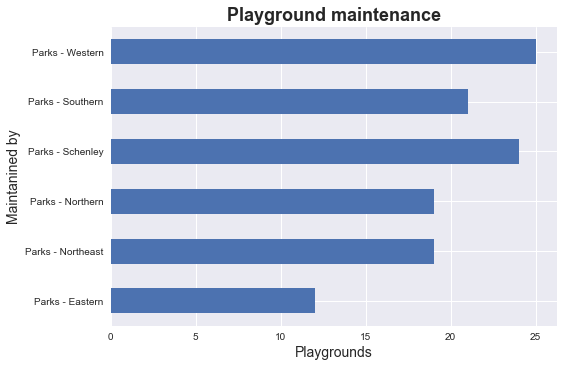

In [2]:
plt.style.use('seaborn')
playgrounds.groupby('maintenance_responsibility').count().plot.barh(legend=None,y='park')
plt.title("Playground maintenance",fontsize=18,fontweight='bold')
plt.xlabel("Playgrounds",fontsize=14)
plt.ylabel("Maintanined by",fontsize=14)

From the graph, Parks-Western and Parks-Schenley maintain the highest number of parks and Parks-Northern and Parks-Northeast maintain the name number of parks. It is fair to assume that the the one who maintains many parks has more experience over time and is equipped with all the resources to continue to do so.

When you look at the dataset you will notice that majority of parks have only one playground, in fact, more than a hundered playgrounds have only a single playground, therefore, we will only be looking at parks with more than one playground.

We do this by creating a new dataset named parks that contains details of parks with more than one playground. This is done by using a simple filter function:

In [7]:
def filter_function(x,threshold):
    return x['name']>threshold

parks = playgrounds.groupby('park').count()
parks = parks.groupby(parks.index).filter(filter_function,threshold=1)

Using the newly created dataset parks we will plot a bar graph to see the number of playgrounds each park has:

Text(0, 0.5, 'Playgrounds count')

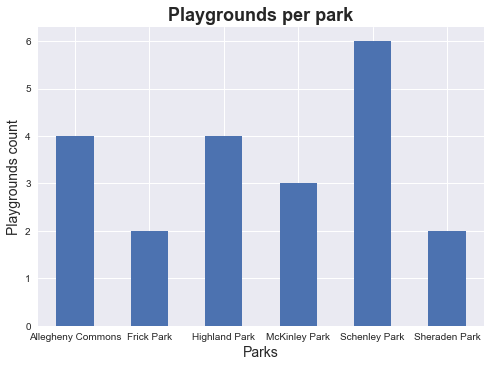

In [8]:
parks.plot.bar(legend=None,y='name',rot=0)  
plt.title("Playgrounds per park",fontsize=18,fontweight='bold')
plt.xlabel("Parks",fontsize=14)
plt.ylabel("Playgrounds count",fontsize=14)

We can observe that Schenley Park has the most number of playgrounds followed by Allegheny Commons and Highland park having equal number of playgrounds.

Let us look at who maintains these three parks. This is again achieved by using a simple filter fuction and strong one filtered row as new dataset named playground: 

In [21]:
def filter_function(x,threshold):
    return x['park']==threshold

playground = playgrounds.groupby(playgrounds.index).filter(filter_function,threshold='Schenley Park')
playground = playground.head(1)
print("Schenley Park is maintained by    :",(playground['maintenance_responsibility']).to_string(index=False))

playground = playgrounds.groupby(playgrounds.index).filter(filter_function,threshold='Allegheny Commons')
playground = playground.head(1)
print("Allegheny Commons is maintained by:",(playground['maintenance_responsibility']).to_string(index=False))

playground = playgrounds.groupby(playgrounds.index).filter(filter_function,threshold='Highland Park')
playground = playground.head(1)
print("Highland Park is maintained by    :",(playground['maintenance_responsibility']).to_string(index=False))

Schenley Park is maintained by    : Parks - Schenley
Allegheny Commons is maintained by: Parks - Northern
Highland Park is maintained by    : Parks - Northeast


Schenley Park is maintained by Parks-Schenley which accoring to the first graph maintains one of the highest number of parks and Allegheny Commons and Highland Park are maintained by Parks-Northern and Parks-Northeast which are are on the same level from the first graph.

* **Therefore, the ranking of the top three parks in terms of playgrounds is :**  
1) Schenley Park  
2) Allegheny Commons / Highland Park

Now, we will to work with the courts dataset alone. The dataset contains many columns but like before we will be only focusing on the columns titled 'name' , 'type' , and 'park'

The following code gives the summary of statistics for number of courts a parks has:

In [22]:
stat = courts.groupby('park').count().describe()
stat.loc[:,'name']

count    98.000000
mean      2.479592
std       2.729108
min       1.000000
25%       1.000000
50%       2.000000
75%       2.000000
max      18.000000
Name: name, dtype: float64

It can observed that on average a park has 2 parks with a standard deviation of 3. We wish to consider the above average parks so will only focus on parks with more than 3 courts i.e. at least 4 courts.

This is again done by using a simple filter function and storing the filtered data in a new dataset named court:

In [23]:
def filter_function(x,threshold):
    return x['name']>threshold

court = courts.groupby('park').count()
court = court.groupby(court.index).filter(filter_function,threshold=3)

Plotting the data of the courts dataset i.e. graph representing number of courts per park: 

Text(0, 0.5, 'Parks')

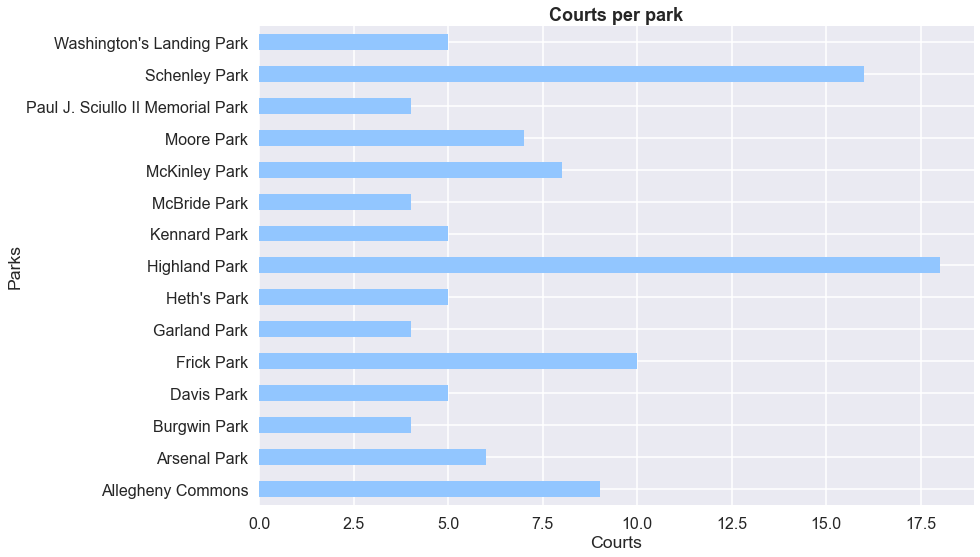

In [25]:
plt.style.use('seaborn-pastel')
court.plot.barh(legend=None,y='name')
plt.title("Courts per park",fontsize=18,fontweight='bold')
plt.xlabel("Courts")
plt.ylabel("Parks")

It can be observed that the top four parks in order are Highland Park, Schenley Park, Frick Park, and Allegheny Commons.

If we recall, Schenley Park was ranked first with respect to playground and here it is likely to be ranked at top two with respect to courts and thus we might conclude that Schenley Park is the best. But this is a mistake. A park with most number of courts need not be the best, what if all the courts in had was only volleyball? You need options, differnt courts to choose, so it is important to look at the type of courts each park has.

The following code does just that. Looking at each of the top four parks and the unique courts it has:

In [26]:
def filter_function(x,threshold):
    return x['park']==threshold

h_park = courts.groupby(courts.index).filter(filter_function,threshold='Highland Park')
s_park = courts.groupby(courts.index).filter(filter_function,threshold='Schenley Park')
f_park = courts.groupby(courts.index).filter(filter_function,threshold='Frick Park')
a_park = courts.groupby(courts.index).filter(filter_function,threshold='Allegheny Commons')

Text(0, 0.5, '')

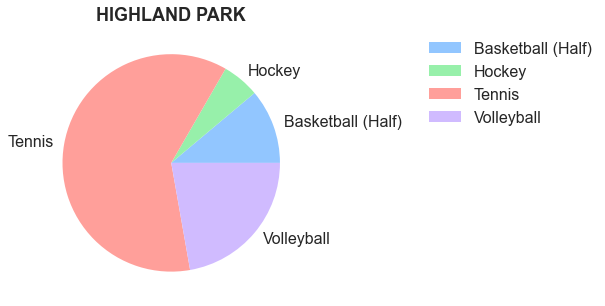

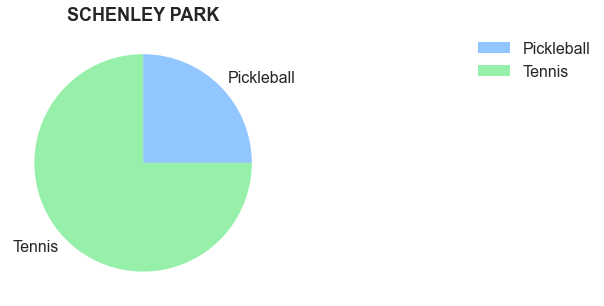

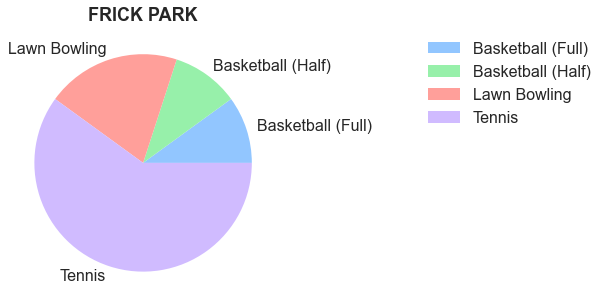

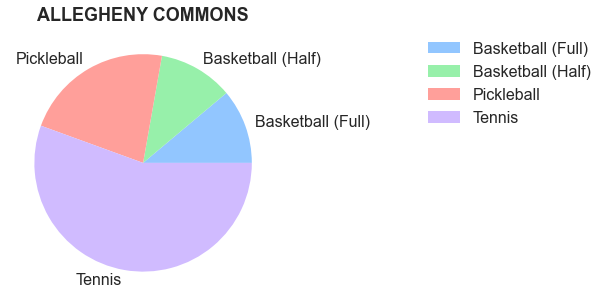

In [27]:
h_park.groupby('type').count().plot.pie(y='park',figsize=(5,5))
plt.title("HIGHLAND PARK",fontsize=18,fontweight='bold')
plt.legend(bbox_to_anchor=(2.1,1))
plt.ylabel(None)

s_park.groupby('type').count().plot.pie(y='park',figsize=(5,5))
plt.title("SCHENLEY PARK",fontsize=18,fontweight='bold')
plt.legend(bbox_to_anchor=(2.2,1))
plt.ylabel(None)

f_park.groupby('type').count().plot.pie(y='park',figsize=(5,5))
plt.title("FRICK PARK",fontsize=18,fontweight='bold')
plt.legend(bbox_to_anchor=(2.2,1))
plt.ylabel(None)

a_park.groupby('type').count().plot.pie(y='park',figsize=(5,5))
plt.title("ALLEGHENY COMMONS",fontsize=18,fontweight='bold')
plt.legend(bbox_to_anchor=(2.2,1))
plt.ylabel(None)

We see that Schenley Park, with higher number of courts, does not offer much choice in comparison to the rest

* **Therefore, the ranking of the top three parks in terms of courts is :**  
1) Highland Park   
2) Allegheny Commons / Frick Park  
3) Schenley Park

#### Looking at analysis thus far from both the datasets:
* Best Parks in terms of playgrounds:  
  1)Schenley Park  
  2)Allegheny Commons / Highland Park  
  
* Best Parks in terms of courts:  
  1)Highland Park  
  2)Allegheny Commons / Frick Park  
  3)Schenly Park

#### **Therefore, the `final ranking of best parks` is:**
1) Highland Park  
2) Allegheny Commons / Schenly Park